# Monte Carlo slopes

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from numpy.random import default_rng
from sklearn.linear_model import LinearRegression

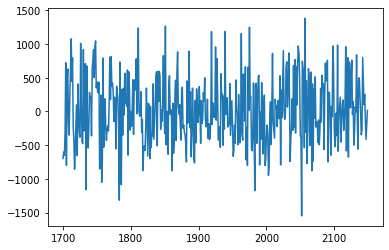

In [3]:
rng = default_rng(22)

x = np.arange(1700,2150)
x_mean = np.mean(x)
x_std = np.std(x)
x_norm = (x-x_mean)/x_std

t_noise = rng.standard_normal(len(x))*500
plt.plot(x,t_noise)

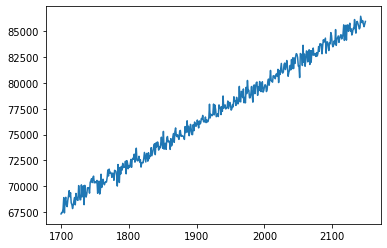

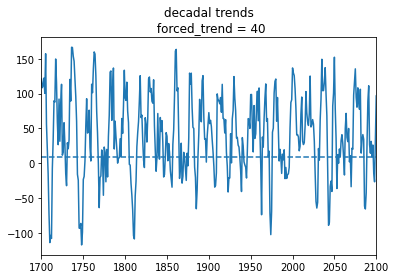

In [4]:
chunk_len = 10

for trend_val in (40,):
    t_total = t_noise + x * trend_val
    plt.plot(x,t_total)
    plt.show()
    
    slopes = []
    slopes = np.zeros((len(x)))
    for iy in np.arange(0,len(x)-chunk_len):
        model = LinearRegression().fit(x[iy:iy+chunk_len].reshape(-1, 1), t_total[iy:iy+chunk_len])
        slopes[iy] = model.coef_
        # print(model.coef_)
        # print(model.intercept_)
    
    plt.figure()
    plt.plot(x,slopes)
    plt.axhline(y=0.22*trend_val, linestyle='--')
    plt.title('decadal trends\n forced_trend = ' + str(trend_val))
    plt.xlim(1700,2100)
    plt.show()
    